# Raw data analysis

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
from utils import preprocessing as pre

In [30]:
# Scope data

path = '../Data_Sets/PDB/FASTA'
file_name = 'mask_8.fasta'
dict_ = {'id':[] ,'mask':[],'seq':[], 'mask_bin':[], 'seq_bin':[], 'loss_weight':[], 'seq_int':[]}
count = 0
seq_length = 1024
for i, rec in enumerate(SeqIO.parse(os.path.join(path,file_name),'fasta')):
    if i >500000:
        break
    dict_['id'].append(rec.id)
    dict_['mask'].append(rec.description.split('|lcl|')[-1])
    dict_['seq'].append(rec.seq)
    dict_['loss_weight'].append(pre.loss_weight(len(list(rec.seq)),seq_length))
    dict_['mask_bin'].append(pre.to_binary_mask(pre.mask_padding(rec.description.split('|lcl|')[-1], length=seq_length), 8))
    #dict_['seq_bin'].append(pre.zero_padding(pre.to_binary(rec.seq),length=seq_length))
    dict_['seq_int'].append(pre.to_int(rec.seq, max_length=seq_length))
    


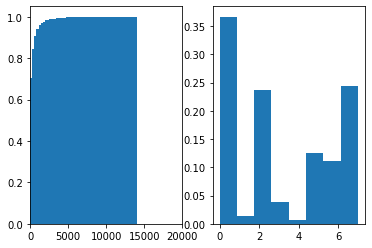

[0.36662015 0.01372188 0.23710783 0.03837334 0.00655157 0.12591035
 0.11040446 0.24416756] [0.    0.875 1.75  2.625 3.5   4.375 5.25  6.125 7.   ] <a list of 8 Patch objects>


In [31]:
seq_len_dist = [len(i) for i in dict_['seq']]
mask_dist = []
for i in dict_['mask']:
    for j in i:
        if j == 'H':
            mask_dist.append(0)
        elif j == 'B':
            mask_dist.append(1)
        elif j == 'E':
            mask_dist.append(2)
        elif j == 'G':
            mask_dist.append(3)
        elif j == 'I':
            mask_dist.append(4)
        elif j == 'T':
            mask_dist.append(5)
        elif j== 'S':
            mask_dist.append(6)
        elif j== '-':
            mask_dist.append(7)
        elif j == 'C':
            mask_dist.append(2)

ax1 = plt.subplot(1,2,1)

n, bins, patches = ax1.hist(seq_len_dist, 50,density = True, cumulative = True)
ax1.set_xlim(0,20000)
ax2 = plt.subplot(1,2,2)
n, bins, patches = ax2.hist(mask_dist, 8, density=True)
plt.show()
print(n, bins, patches)

In [28]:
1.2994508*0.333333333

0.43315026623351643

In [10]:
d = {'H':0.372, 'B':0.2105, 'C':0.4173}
print(0.62604729*0.66666667)
print(0.31580898*0.66666667)
print(0.55814373*0.66666667)

0.41736486208682433
0.21053932105269663
0.37209582186047907


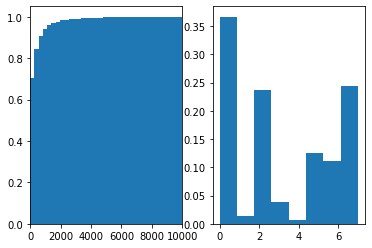

[0.36662015 0.01372188 0.23710783 0.03837334 0.00655157 0.12591035
 0.11040446 0.24416756] [0.    0.875 1.75  2.625 3.5   4.375 5.25  6.125 7.   ] <a list of 8 Patch objects>


In [32]:
ax1 = plt.subplot(1,2,1)

n, bins, patches = ax1.hist(seq_len_dist, 50,density = True, cumulative = True)
ax1.set_xlim(0,10000)
ax2 = plt.subplot(1,2,2)
n, bins, patches = ax2.hist(mask_dist, 8, density=True)
plt.show()
print(n, bins, patches)

In [2]:
path = '../Data_Sets/PDB/FASTA'
file_name_tor = 'mask_torsion.fasta'
file_name_mas = 'mask_3.fasta'
dict_ = {'id':[] ,'mask':[],'seq':[], 'mask_bin':[], 'seq_bin':[], 'loss_weight':[], 'seq_int':[], 'area':[], 'angle':[]}
count = 0
seq_length = 1024
d = {'H':1/0.372, 'B':1/0.2105, 'C':1/0.4173}
for i, rec in enumerate(SeqIO.parse(os.path.join(path,file_name_tor),'fasta')):
    if i >50000:
        break
    if len(rec.seq)>seq_length:
        continue
    dict_['id'].append(rec.id)
    dict_['angle'].append(pre.zero_padding(np.array([ j.split(',')[1:] for j in rec.description.split('|lcl|')[-1].split(';')][1:]),length=seq_length))
    tmp = np.zeros((seq_length,))
    f = [j.split(',')[0] if j.split(',')[0] != 'NA' else 0.0 for j in rec.description.split('|lcl|')[-1].split(';')][1:]
    tmp[:len(rec.seq)] = f
    dict_['area'].append(tmp)
    dict_['seq'].append(rec.seq)
    dict_['seq_int'].append(pre.to_int(rec.seq, max_length=seq_length))
    
for i, rec in enumerate(SeqIO.parse(os.path.join(path,file_name_mas),'fasta')):
    if i >50000:
        break
    if len(rec.seq)>seq_length:
        continue    
    dict_['loss_weight'].append(pre.loss_weight(rec.description.split('|lcl|')[-1], d,seq_length))
    dict_['mask_bin'].append(pre.to_binary_mask(pre.mask_padding(rec.description.split('|lcl|')[-1], length=seq_length)))
    dict_['mask'].append(rec.description.split('|lcl|')[-1])
    #dict_['seq_bin'].append(pre.zero_padding(pre.to_binary(rec.seq),length=seq_length))

6.281439977927592 0.0
6.281439977927592 0.0


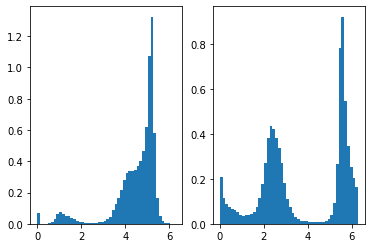

In [13]:
angles = np.array(dict_['angle'])
phi = ((360 + angles[angles[:,:,0] != 0,0]) % 360)/180 * np.pi
psi = ((360 + angles[angles[:,:,1] != 0,1]) % 360)/180 * np.pi

print(np.max(phi), np.min(phi))
print(np.max(psi), np.min(psi))

ax1 = plt.subplot(1,2,1)

ax1.hist(phi, 50, density = True)
ax2 = plt.subplot(1,2,2)
ax2.hist(psi, 50, density=True)
plt.show()
#print(n, bins, patches)

In [8]:
print(phi.shape)

(46491, 1024)
